# **STEP 1: IMPORT NECESSARY MODULES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# **STEP 2: DATA CLEANING**
With the understanding that Data tells stories, it is important that it is clean before any analysis is made. As the saying goes, Garbage In, Garbage Out. The data was cleaning in Six steps.

In [ ]:
df = pd.read_excel('Sample SuperStore.xlsx')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


STEP 2.2 How big is the dataset?

In [ ]:
df.shape
print('The number of rows is {} and number columns in the dataframe is {}'.format(df.shape[0],df.shape[1]))

The number of rows is 9994 and number columns in the dataframe is 21


STEP 2.3 Is each column title of the dataset clean and descriptive?

The reason why this is important is because in the case where other individual or individuals works on your data, the possibility of understanding and analyzing the context of each column is easy.


In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')




*   In the line of code above, it is clear that some of the titles have white spaces, and one column titled 'Sales' was renamed to 'Discounted Sales' as it was discovered that the Sales column were sales made per discount on each product sold.





In [ ]:
df.columns = ['RowID','OrderID','OrderDate', 'ShipDate', 'ShipMode', 'CustomerID', 'CustomerName', 'Segment' ,
                         'Country', 'City', 'State', 'PostalCode', 'Region', 'ProductID', 'Category', 'SubCategory',
                         'ProductName' , 'DiscountedSales', 'Quantity', 'Discount(%)', 'Profit']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   RowID            9994 non-null   int64         
 1   OrderID          9994 non-null   object        
 2   OrderDate        9994 non-null   datetime64[ns]
 3   ShipDate         9994 non-null   datetime64[ns]
 4   ShipMode         9994 non-null   object        
 5   CustomerID       9994 non-null   object        
 6   CustomerName     9994 non-null   object        
 7   Segment          9994 non-null   object        
 8   Country          9994 non-null   object        
 9   City             9994 non-null   object        
 10  State            9994 non-null   object        
 11  PostalCode       9994 non-null   int64         
 12  Region           9994 non-null   object        
 13  ProductID        9994 non-null   object        
 14  Category         9994 non-null   object 

STEP 2.4 Check for duplicates in the dataset and remove them

In [ ]:
duplicates = df.duplicated(keep = False)
duplicates.sum()

0

In [ ]:
df.shape

(9994, 21)

STEP 2.5 A step by step cleaning of each column in the dataset



*   **Column 1 - Order ID**


In [ ]:
df['OrderID'].describe()

count               9994
unique              5009
top       CA-2017-100111
freq                  14
Name: OrderID, dtype: object

In [ ]:
df['OrderID'].dtype

dtype('O')



*   **Column 2 - Order Date**



In [ ]:
df['OrderDate'].dtype

dtype('<M8[ns]')



*   **Column 3 - Ship Date**



In [ ]:
df['ShipDate'] = pd.to_datetime(df['ShipDate'])    #checking the datatype of the ShipDate Column
df['ShipDate'].dtype

dtype('<M8[ns]')



*   **Column 4 - Ship Mode**



In [ ]:
df['ShipMode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [ ]:
df['ShipMode'] = df['ShipMode'].astype('category')    # Changing to datatype to category
df['ShipMode'].dtype

CategoricalDtype(categories=['First Class', 'Same Day', 'Second Class', 'Standard Class'], ordered=False)

In [ ]:
df['ShipMode'].describe()   #summary statistcs of the ShipMode Column

count               9994
unique                 4
top       Standard Class
freq                5968
Name: ShipMode, dtype: object



*   **Column 5 - Customer ID**




In [ ]:
df['CustomerID'].nunique()


793

In [ ]:
df['CustomerID'].describe()

count         9994
unique         793
top       WB-21850
freq            37
Name: CustomerID, dtype: object



*   **Column 6 - Customer Name**



In [ ]:
df['CustomerName'].describe()   #checking summary statistics of the Customer Name column

count              9994
unique              793
top       William Brown
freq                 37
Name: CustomerName, dtype: object



*   **Column 7 - Segment**



In [ ]:
df['Segment'].describe()    #checking summary statistics of the Segment column

count         9994
unique           3
top       Consumer
freq          5191
Name: Segment, dtype: object

In [ ]:
df['Segment'] = df['Segment'].astype('category')  #changing the datatype of the segment column from object to category dtype
df['Segment'].dtype

CategoricalDtype(categories=['Consumer', 'Corporate', 'Home Office'], ordered=False)



*   **Column 8 - City**



In [ ]:
df['City'].describe()

count              9994
unique              531
top       New York City
freq                915
Name: City, dtype: object

*   **Column 9 - State**



In [ ]:
df['State'].describe()

count           9994
unique            49
top       California
freq            2001
Name: State, dtype: object



*   **Column 10 - Postal Code**



In [ ]:
df['PostalCode'] = df['PostalCode'].astype('str')   # Changing PostalCode from int to str
df['PostalCode'].describe()       #checking summary statistics of the PostalCode column

count      9994
unique      631
top       10035
freq        263
Name: PostalCode, dtype: object



*   **Column 11 - Region**



In [ ]:
df['Region'].describe()        #checking summary statistics of the Region column

count     9994
unique       4
top       West
freq      3203
Name: Region, dtype: object



*   **Column 12 - Product ID**



In [ ]:
df['ProductID'].describe()

count                9994
unique               1862
top       OFF-PA-10001970
freq                   19
Name: ProductID, dtype: object



*   **Column 13 - Product Name**



In [ ]:
df['ProductName'].describe()

count                9994
unique               1850
top       Staple envelope
freq                   48
Name: ProductName, dtype: object



*   **Column 14 - Category**


In [ ]:
df['Category'].describe()

count                9994
unique                  3
top       Office Supplies
freq                 6026
Name: Category, dtype: object

In [ ]:
df['Category'] = df['Category'].astype('category')  #change datatype of Category column to category datatype
df['Category']

0             Furniture
1             Furniture
2       Office Supplies
3             Furniture
4       Office Supplies
             ...       
9989          Furniture
9990          Furniture
9991         Technology
9992    Office Supplies
9993    Office Supplies
Name: Category, Length: 9994, dtype: category
Categories (3, object): ['Furniture', 'Office Supplies', 'Technology']



*   **Column 15 - SubCategory**


In [ ]:
df['SubCategory'].describe()

count        9994
unique         17
top       Binders
freq         1523
Name: SubCategory, dtype: object

In [ ]:
df['SubCategory'] = df['SubCategory'].astype('category')   #change dataype of SubCategory Column
df['SubCategory']

0         Bookcases
1            Chairs
2            Labels
3            Tables
4           Storage
           ...     
9989    Furnishings
9990    Furnishings
9991         Phones
9992          Paper
9993     Appliances
Name: SubCategory, Length: 9994, dtype: category
Categories (17, object): ['Accessories', 'Appliances', 'Art', 'Binders', ..., 'Phones', 'Storage',
                          'Supplies', 'Tables']



*   **Column 16 - DiscountedSales**



In [ ]:
df['DiscountedSales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: DiscountedSales, dtype: float64



*   **Column 17 - Quantity**



In [ ]:
df['Quantity'].describe()

count    9994.000000
mean        3.789574
std         2.225110
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64



*   **Column 18 - Discount(%)**



In [ ]:
df['Discount(%)'].describe()

count    9994.000000
mean        0.156203
std         0.206452
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount(%), dtype: float64



*   **Column 19 - Profit**



In [ ]:
df['Profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

STEP 2.6 - Checking summary statistics of numerical columns in the dataset

In [ ]:
df.describe()

,RowID,DiscountedSales,Quantity,Discount(%),Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,229.858001,3.789574,0.156203,28.656896
std,2885.163629,623.245101,2.225110,0.206452,234.260108
min,1.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,22638.480000,14.000000,0.800000,8399.976000


STEP 2.7 Checking summary statistics of non-numerical columns in the dataset

In [ ]:
df.describe(include='object')

,OrderID,CustomerID,CustomerName,Country,City,State,PostalCode,Region,ProductID,ProductName
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,793,793,1,531,49,631,4,1862,1850
top,CA-2017-100111,WB-21850,William Brown,United States,New York City,California,10035,West,OFF-PA-10001970,Staple envelope
freq,14,37,37,9994,915,2001,263,3203,19,48


STEP 2.8 Adding New Columns To the Dataset

New columns were added to the dataset in order to easy analyze the data in the dataset.

In [ ]:
df_month = df["OrderDate"].dt.month_name()   #adding a month column
df.insert(loc = 3, column = 'OrderMonth', value = df_month)
df_year = pd.DatetimeIndex(df['OrderDate']).year  #adding a new column called Year
df.insert(loc = 4, column = 'OrderYear', value = df_year)
df['OrderYear'] = df['OrderYear'].astype('str')  #changing OrderYear column from integer to string
df['OrderYear']

0       2016
1       2016
2       2016
3       2015
4       2015
        ... 
9989    2014
9990    2017
9991    2017
9992    2017
9993    2017
Name: OrderYear, Length: 9994, dtype: object



*   Calculating the original sales without discounts and adding it to the dataset as a new column



In [ ]:
original_sales = (1/(1-df['Discount(%)']))*df['DiscountedSales']
original_sales

0        261.96
1        731.94
2         14.62
3       1741.05
4         27.96
         ...   
9989      31.56
9990      91.96
9991     323.22
9992      29.60
9993     243.16
Length: 9994, dtype: float64

In [ ]:
df['OriginalSales'] = original_sales



*   Calculating Unit Price of each product and adding it to the dataset as a new column



In [ ]:
df['UnitPrice'] = original_sales/df['Quantity']
df['UnitPrice']

0       130.98
1       243.98
2         7.31
3       348.21
4        13.98
         ...  
9989     10.52
9990     45.98
9991    161.61
9992      7.40
9993    121.58
Name: UnitPrice, Length: 9994, dtype: float64



*   Calculating Cost Price of each product and adding it to the dataset as a new column



In [ ]:
df_cost_price = df['DiscountedSales'] - df['Profit']
df_cost_price

0        220.0464
1        512.3580
2          7.7486
3       1340.6085
4         19.8516
          ...    
9989      21.1452
9990      76.3268
9991     239.1828
9992      16.2800
9993     170.2120
Length: 9994, dtype: float64

In [ ]:
df['CostPrice'] = df_cost_price



*   Calculating Discounted Amount of each product and adding it to the dataset as a new column



In [ ]:
df['DiscountedAmount'] = df['OriginalSales'] - df['DiscountedSales']



*   Calculating Profit Percentage of each product and adding it to the dataset as a new column



In [ ]:
df['Profit%']=(df['Profit']/df['CostPrice'])*100



*   With the order date and delivery date columns n the dataset, delivery day lengths were calculated and added as a new column to the dataset



In [ ]:
df_interval = df["ShipDate"] - df["OrderDate"]
df_interval = df_interval / np.timedelta64(1,'D')
df.insert(loc = 5, column = 'DeliveryDays', value = df_interval)
df['DeliveryDays'] = df['DeliveryDays'].astype('int')   #changing datatype of deliverydays column from int to str
df['Reliability'] = np.where(df['DeliveryDays'] >= 5, 'Delayed', 'Timely')  #confirmation on whether deliveries were timely or delayed.

# **STEP 3: EXPLORATORY DATA ANALYSIS**

The fundamental purpose of exploratory data analysis is to aid in the examination of data prior to making any assumptions.

It can aid in the detection of obvious errors, the understanding of data patterns, the detection of outliers or unexpected events, and the discovery of noteworthy connections between variables.

The followng visualizations were done in the lines of code below.



**Which are the most selling products?**

In [ ]:
boughts = df.groupby('ProductName').agg({'Quantity': 'sum'}).sort_values('Quantity',ascending=False)[:10]
boughts

,Quantity
ProductName,
Staples,215
Staple envelope,170
Easy-staple paper,150
Staples in misc. colors,86
KI Adjustable-Height Table,74
Avery Non-Stick Binders,71
Storex Dura Pro Binders,71
GBC Premium Transparent Covers with Diagonal Lined Pattern,67
"Situations Contoured Folding Chairs, 4/Set",64


<ipython-input-53-f71fec975a1c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ProductName', y='Quantity', data=boughts.reset_index(), palette=custom_palette)


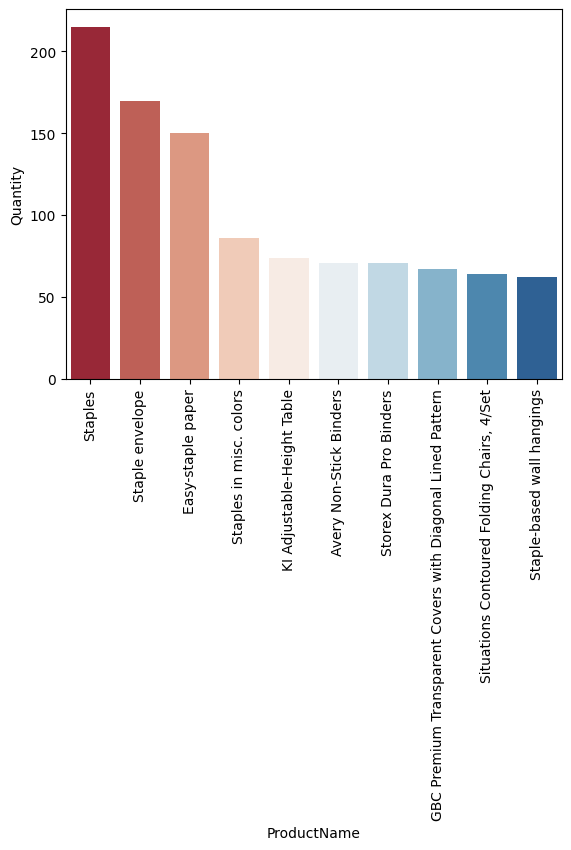

In [ ]:

custom_palette = sns.color_palette("RdBu", 10)
sns.barplot(x='ProductName', y='Quantity', data=boughts.reset_index(), palette=custom_palette)
plt.xticks(rotation='vertical')
plt.show()



**Which are the Top 10 products by sales?**

In [ ]:
productSales = pd.DataFrame(df.groupby('ProductName').sum()['DiscountedSales'])
productSales.sort_values(by=['DiscountedSales'], inplace=True, ascending=False)
productSales.head(10)

<ipython-input-54-7b19836f6643>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  productSales = pd.DataFrame(df.groupby('ProductName').sum()['DiscountedSales'])


,DiscountedSales
ProductName,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
GBC Ibimaster 500 Manual ProClick Binding System,19024.500
Hewlett Packard LaserJet 3310 Copier,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
GBC DocuBind P400 Electric Binding System,17965.068


**Which are the most profitable products?**

In [ ]:
profitable_products = pd.DataFrame(df.groupby(['ProductName']).sum()['Profit'])
profitable_products.sort_values(by=['Profit'], inplace = True, ascending = False)
profitable_products.head(10)

<ipython-input-55-83764279e5cb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profitable_products = pd.DataFrame(df.groupby(['ProductName']).sum()['Profit'])


,Profit
ProductName,
Canon imageCLASS 2200 Advanced Copier,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,7753.0390
Hewlett Packard LaserJet 3310 Copier,6983.8836
Canon PC1060 Personal Laser Copier,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",4094.9766
Ativa V4110MDD Micro-Cut Shredder,3772.9461
"3D Systems Cube Printer, 2nd Generation, Magenta",3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System,3696.2820
Ibico EPK-21 Electric Binding System,3345.2823


<ipython-input-56-dd58082841e9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ProductName',y='Profit',data=profitable_products.head(10).reset_index(),palette=custom_palette)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Canon imageCLASS 2200 Advanced Copier'),
  Text(1, 0, 'Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind'),
  Text(2, 0, 'Hewlett Packard LaserJet 3310 Copier'),
  Text(3, 0, 'Canon PC1060 Personal Laser Copier'),
  Text(4, 0, 'HP Designjet T520 Inkjet Large Format Printer - 24" Color'),
  Text(5, 0, 'Ativa V4110MDD Micro-Cut Shredder'),
  Text(6, 0, '3D Systems Cube Printer, 2nd Generation, Magenta'),
  Text(7, 0, 'Plantronics Savi W720 Multi-Device Wireless Headset System'),
  Text(8, 0, 'Ibico EPK-21 Electric Binding System'),
  Text(9, 0, 'Zebra ZM400 Thermal Label Printer')])

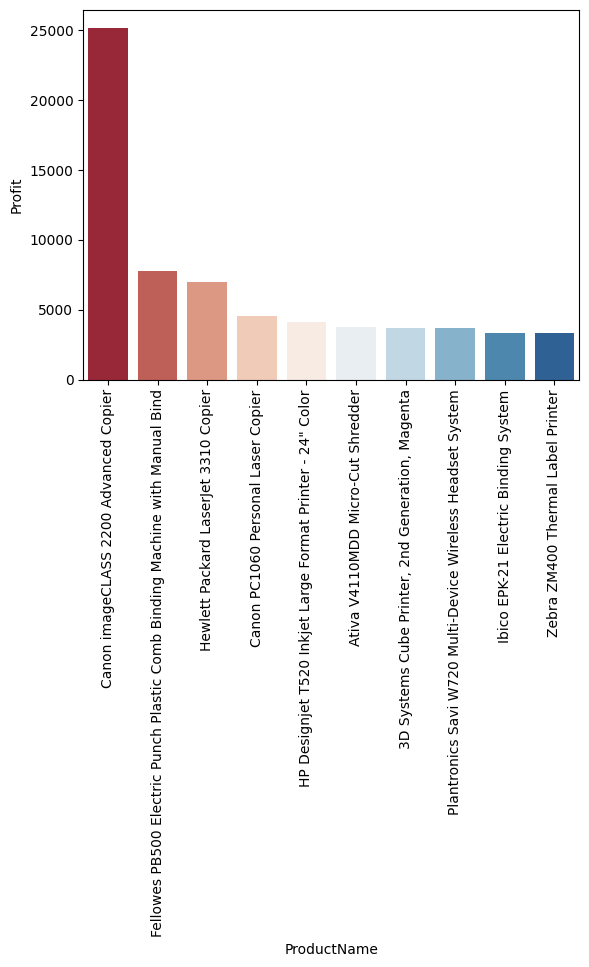

In [ ]:
custom_palette = sns.color_palette("RdBu", 10)
sns.barplot(x='ProductName',y='Profit',data=profitable_products.head(10).reset_index(),palette=custom_palette)
plt.xticks(rotation = 'vertical')

**What category sold the most?**

In [ ]:
df.groupby(['Category','DiscountedSales']).sum()

<ipython-input-57-4cfbbc8322f1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Category','DiscountedSales']).sum()


RowID  DeliveryDays  Quantity  Discount(%)  \
Category   DiscountedSales                                               
Furniture  0.444                0             0         0          0.0   
           0.556                0             0         0          0.0   
           0.836                0             0         0          0.0   
           0.852                0             0         0          0.0   
           0.876                0             0         0          0.0   
...                           ...           ...       ...          ...   
Technology 10499.970         4191             5         3          0.0   
           11199.968         2624             2         4          0.2   
           13999.960         8154             2         4          0.0   
           17499.950         6827             7         5          0.0   
           22638.480         2698             5         6          0.5   

                               Profit  OriginalSales  UnitPrice   CostPrice  \
Category   DiscountedSales                                                    
Furniture  0.444               0.0000           0.00       0.00      0.0000   
           0.556               0.0000           0.00       0.00      0.0000   
           0.836               0.0000           0.00       0.00      0.0000   
           0.852               0.0000           0.00       0.00      0.0000   
           0.876               0.0000           0.00       0.00      0.0000   
...                               ...            ...        ...         ...   
Technology 10499.970        5039.9856       10499.97    3499.99   5459.9844   
           11199.968        3919.9888       13999.96    3499.99   7279.9792   
           13999.960        6719.9808       13999.96    3499.99   7279.9792   
           17499.950        8399.9760       17499.95    3499.99   9099.9740   
           22638.480       -1811.0784       45276.96    7546.16  24449.5584   

                            DiscountedAmount    Profit%  
Category   DiscountedSales                               
Furniture  0.444                       0.000   0.000000  
           0.556                       0.000   0.000000  
           0.836                       0.000   0.000000  
           0.852                       0.000   0.000000  
           0.876                       0.000   0.000000  
...                                      ...        ...  
Technology 10499.970                   0.000  92.307692  
           11199.968                2799.992  53.846154  
           13999.960                   0.000  92.307692  
           17499.950                   0.000  92.307692  
           22638.480               22638.480  -7.407407  

[18432 rows x 10 columns]

**Which are the most profitable category?**

In [ ]:
profitable_category = pd.DataFrame(df.groupby(['Category']).sum()['Profit'])
profitable_category.sort_values(by=['Profit'], inplace = True, ascending = False)
profitable_category

<ipython-input-58-2817e451d276>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profitable_category = pd.DataFrame(df.groupby(['Category']).sum()['Profit'])


,Profit
Category,
Technology,145454.9481
Office Supplies,122490.8008
Furniture,18451.2728


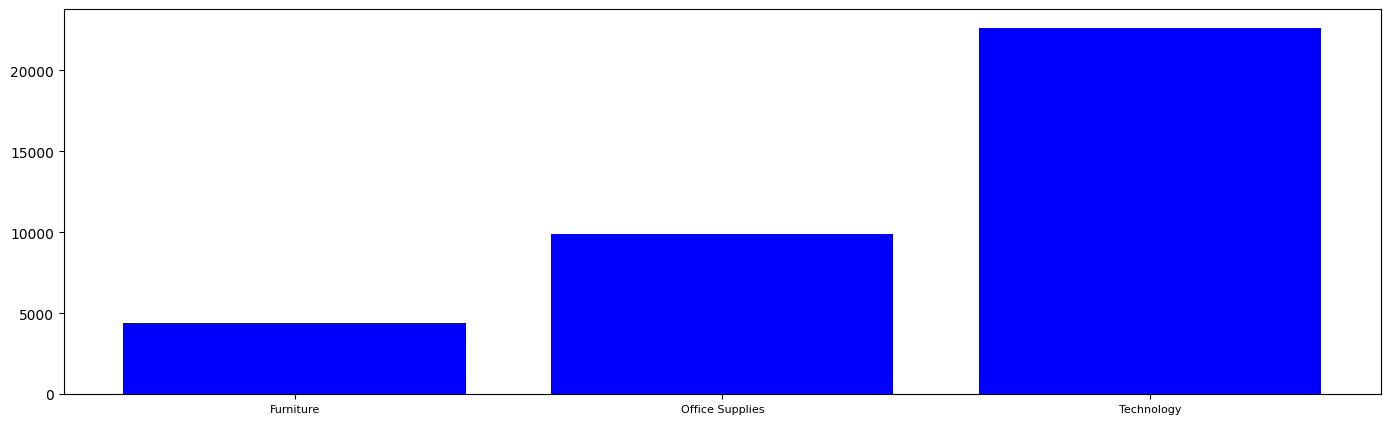

In [ ]:
plt.figure(figsize=(17, 5))
plt.bar(df['Category'],df['DiscountedSales'],color = 'b')
plt.xticks(size=8)
plt.show()

**Total sales values by category and subcategory**

In [ ]:
df.groupby(['Category','SubCategory']).sum()

<ipython-input-60-7b6f2ec5bb1f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Category','SubCategory']).sum()


RowID  DeliveryDays  DiscountedSales  Quantity  \
Category        SubCategory                                                     
Furniture       Accessories        0             0           0.0000         0   
                Appliances         0             0           0.0000         0   
                Art                0             0           0.0000         0   
                Binders            0             0           0.0000         0   
                Bookcases    1156535           869      114879.9963       868   
                Chairs       3121503          2406      328449.1030      2356   
                Copiers            0             0           0.0000         0   
                Envelopes          0             0           0.0000         0   
                Fasteners          0             0           0.0000         0   
                Furnishings  4842624          3791       91705.1640      3563   
                Labels             0             0           0.0000         0   
                Machines           0             0           0.0000         0   
                Paper              0             0           0.0000         0   
                Phones             0             0           0.0000         0   
                Storage            0             0           0.0000         0   
                Supplies           0             0           0.0000         0   
                Tables       1572664          1242      206965.5320      1241   
Office Supplies Accessories        0             0           0.0000         0   
                Appliances   2407754          1859      107532.1610      1729   
                Art          3920109          3227       27118.7920      3000   
                Binders      7633935          6126      203412.7330      5974   
                Bookcases          0             0           0.0000         0   
                Chairs             0             0           0.0000         0   
                Copiers            0             0           0.0000         0   
                Envelopes    1207903          1020       16476.4020       906   
                Fasteners    1017287           863        3024.2800       914   
                Furnishings        0             0           0.0000         0   
                Labels       1817254          1457       12486.3120      1400   
                Machines           0             0           0.0000         0   
                Paper        6886090          5326       78479.2060      5178   
                Phones             0             0           0.0000         0   
                Storage      4126649          3363      223843.6080      3158   
                Supplies      993554           763       46673.5380       647   
                Tables             0             0           0.0000         0   
Technology      Accessories  3928080          3012      167380.3180      2976   
                Appliances         0             0           0.0000         0   
                Art                0             0           0.0000         0   
                Binders            0             0           0.0000         0   
                Bookcases          0             0           0.0000         0   
                Chairs             0             0           0.0000         0   
                Copiers       355661           246      149528.0300       234   
                Envelopes          0             0           0.0000         0   
                Fasteners          0             0           0.0000         0   
                Furnishings        0             0           0.0000         0   
                Labels             0             0           0.0000         0   
                Machines      561428           431      189238.6310       440   
                Paper              0             0           0.0000         0   
                Phones       4395985          3557      330007

**Which are the most selling products in subcategory?**

In [ ]:
df.groupby(["Category", "SubCategory"], as_index=False)["Quantity"].count()

,Category,SubCategory,Quantity
0,Furniture,Accessories,0
1,Furniture,Appliances,0
2,Furniture,Art,0
3,Furniture,Binders,0
4,Furniture,Bookcases,228
5,Furniture,Chairs,617
6,Furniture,Copiers,0
7,Furniture,Envelopes,0
8,Furniture,Fasteners,0
9,Furniture,Furnishings,957


**Which customer segments are the most profitable ?**

In [ ]:
profitable_segment = pd.DataFrame(df.groupby(['Segment']).sum()['Profit'])
profitable_segment.sort_values(by=['Profit'], inplace = True, ascending = False)
profitable_segment

<ipython-input-62-e2cbe2c71b0f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profitable_segment = pd.DataFrame(df.groupby(['Segment']).sum()['Profit'])


,Profit
Segment,
Consumer,134119.2092
Corporate,91979.1340
Home Office,60298.6785


<ipython-input-63-15df2f7af49b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment',y='Profit',data=profitable_segment.reset_index(),palette=custom_palette)
<ipython-input-63-15df2f7af49b>:2: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(x='Segment',y='Profit',data=profitable_segment.reset_index(),palette=custom_palette)


([0, 1, 2],
 [Text(0, 0, 'Consumer'), Text(1, 0, 'Corporate'), Text(2, 0, 'Home Office')])

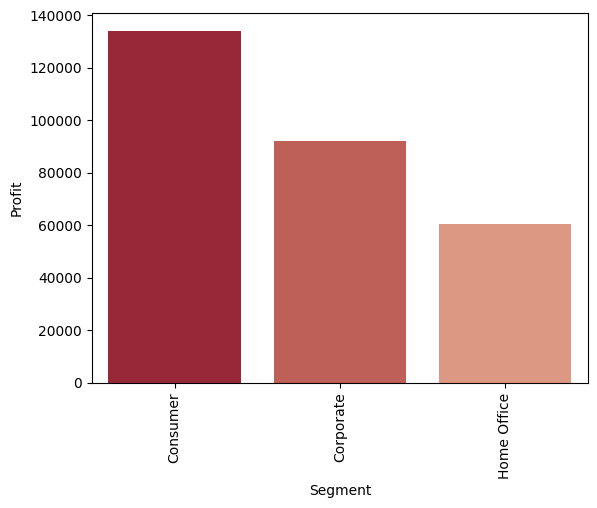

In [ ]:
custom_palette = sns.color_palette("RdBu", 10)
sns.barplot(x='Segment',y='Profit',data=profitable_segment.reset_index(),palette=custom_palette)
plt.xticks(rotation = 'vertical')

**What shipping modes sold the most products?**

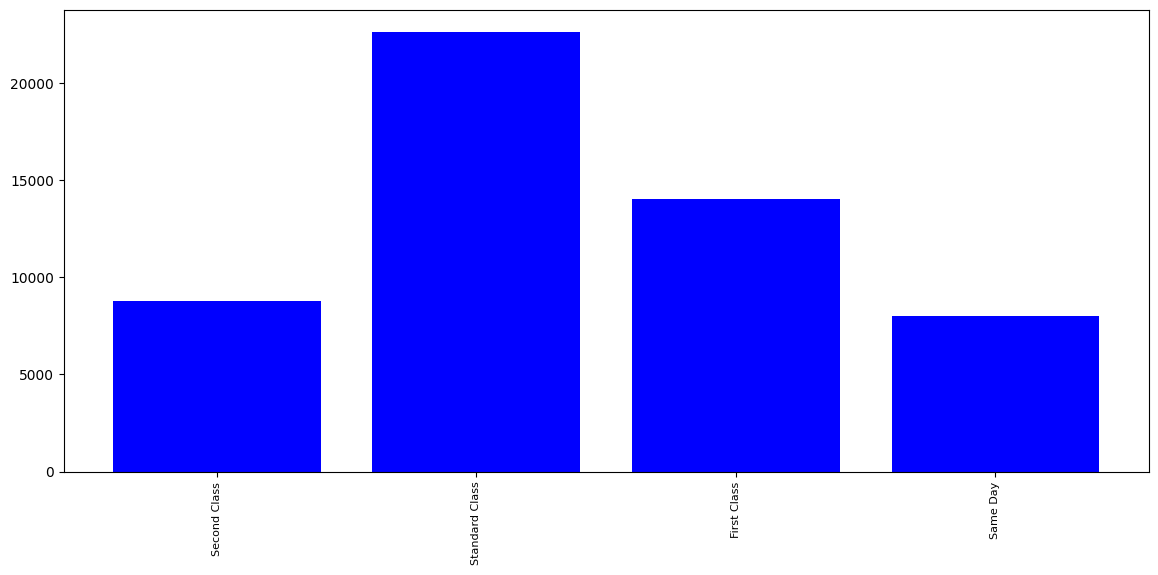

In [ ]:
plt.figure(figsize=(14, 6))
plt.bar(df['ShipMode'],df['DiscountedSales'],color = 'b')
plt.xticks(rotation='vertical', size=8)
plt.show()

Visualize the 'Category' column from the Shipmode column dataset standpoints.

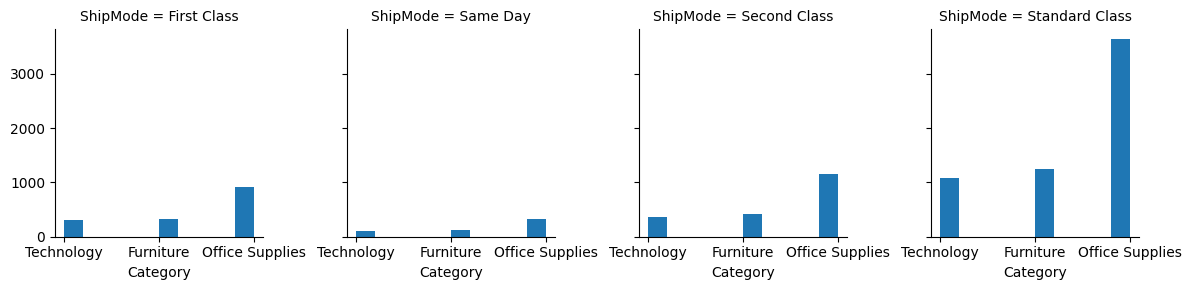

In [ ]:
custom_palette = sns.color_palette("RdBu", 10)
category_hist = sns.FacetGrid(df, col='ShipMode', palette=custom_palette)
category_hist.map(plt.hist, 'Category')

**Which are the Top 10 Countries by sales?**

In [ ]:
countries = pd.DataFrame(df.groupby('Country').sum()['DiscountedSales'])
countries.sort_values('DiscountedSales',inplace=True, ascending=False)
countries.head(10)

<ipython-input-66-7d54b9940d18>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  countries = pd.DataFrame(df.groupby('Country').sum()['DiscountedSales'])


,DiscountedSales
Country,
United States,2.297201e+06


**A pie chart with the 10 countries that have the most sales**

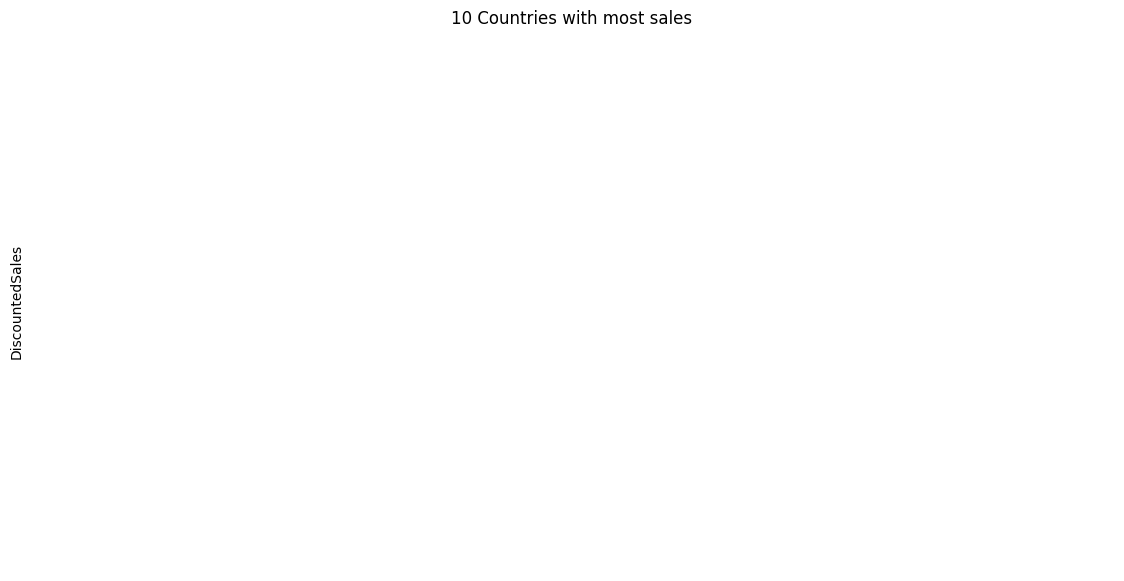

In [ ]:
custom_palette = sns.color_palette("RdBu", 15)
countries = countries.sort_values(by = 'DiscountedSales',ascending = False)[1:11]
colors = custom_palette
plt.figure(figsize=(14, 7))
countries['DiscountedSales'].plot(kind='pie', autopct='%1.1f%%', figsize=(14, 7), colors=colors)
plt.title('10 Countries with most sales')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


**Who are the top-10 most profitable customers?**

In [ ]:
data10 = df.sort_values('Profit',ascending=False).head(10)[['OrderID','CustomerName','Profit']]
data10

,OrderID,CustomerName,Profit
6826,CA-2016-118689,Tamara Chand,8399.9760
8153,CA-2017-140151,Raymond Buch,6719.9808
4190,CA-2017-166709,Hunter Lopez,5039.9856
9039,CA-2016-117121,Adrian Barton,4946.3700
4098,CA-2014-116904,Sanjit Chand,4630.4755
2623,CA-2017-127180,Tom Ashbrook,3919.9888
509,CA-2015-145352,Christopher Martinez,3177.4750
8488,CA-2016-158841,Sanjit Engle,2799.9840
7666,US-2016-140158,Daniel Raglin,2591.9568
6520,CA-2017-138289,Andy Reiter,2504.2216


**Total sales values by year and month**

In [ ]:
date = df.groupby(['OrderYear','OrderMonth']).sum()
date

<ipython-input-122-42fbe8850f2b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  date = df.groupby(['OrderYear','OrderMonth']).sum()


RowID  DeliveryDays  DiscountedSales  Quantity  \
OrderYear OrderMonth                                                     
2014      April        690625           547       28295.3450       536   
          August       729301           619       27909.4685       609   
          December    1373951          1101       69545.6205      1079   
          February     272235           192        4519.8920       159   
          January      346176           329       14236.8950       284   
          July         746403           549       33946.3930       550   
          June         491794           564       34595.1276       521   
          March        871575           624       55691.0090       585   
          May          611708           464       23648.2870       466   
          November    1605852          1355       78628.7167      1219   
          October      865655           534       31453.3930       573   
          September   1298740          1088       81777.3508      1000   
2015      April        773461           694       34195.2085       543   
          August       826534           629       36898.3322       598   
          December    1478539          1240       74919.5212      1203   
          February     307145           263       11951.4110       239   
          January      290895           275       18174.0756       236   
          July         584608           521       28765.3250       557   
          June         769300           573       24797.2920       486   
          March        695521           511       38726.2520       515   
          May          813409           589       30131.6865       575   
          November    1639831          1289       75972.5635      1310   
          October      782639           596       31404.9235       631   
          September   1451814          1257       64595.9180      1086   
2016      April        706340           758       38750.0390       635   
          August       871993           762       31115.3743       693   
          December    1818182          1419       96999.0430      1414   
          February     428663           292       22978.8150       306   
          January      477972           365       18542.4910       358   
          July         980979           767       39261.9630       758   
          June         923881           680       40344.5340       742   
          March        815506           572       51715.8750       579   
          May         1101329           873       56987.7280       863   
          November    1780607          1457       79411.9658      1406   
          October      982987           821       59687.7450       767   
          September   1890365          1454       73410.0249      1316   
2017      April        948011           775       36521.5361       733   
          August      1141105           880       63120.8880       884   
          December    2250814          1867       83829.3188      1723   
          February     593504           468       20301.1334       363   
          January      847373           637       43971.3740       597   
          July        1183701           938       45264.4160       840   
          June        1171681           995       52981.7257       931   
          March       1293993           849       58872.3528       885   
          May         1346912           903       44261.1102       887   
          November    2300116          1747      118447.8250      1840   
          October     1412854          1183       77776.9232      1133   
          September   2358436          1693       87866.6520      1660   

                      Discount(%)      Profit  OriginalSales  UnitPrice  \
OrderYear OrderMonth                                                      
2014      April             14.85   3488.8352       33089.01    8264.19   
          August            20.05   5318.1050       33603.88   10077.96   
          December     

**Total sales chart by the year**

<ipython-input-134-9b5c4b93638a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OrderYear',y='DiscountedSales',data=date.reset_index(),palette=custom_palette)
<ipython-input-134-9b5c4b93638a>:2: UserWarning: The palette list has more values (15) than needed (4), which may not be intended.
  sns.barplot(x='OrderYear',y='DiscountedSales',data=date.reset_index(),palette=custom_palette)


([0, 1, 2, 3],
 [Text(0, 0, '2014'),
  Text(1, 0, '2015'),
  Text(2, 0, '2016'),
  Text(3, 0, '2017')])

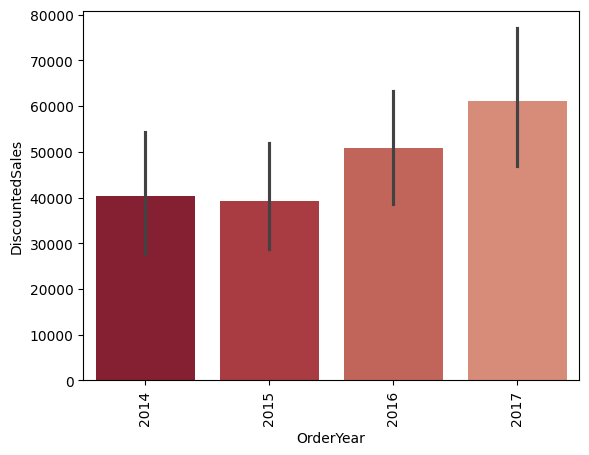

In [ ]:
custom_palette = sns.color_palette("RdBu", 15)
sns.barplot(x='OrderYear',y='DiscountedSales',data=date.reset_index(),palette=custom_palette)
plt.xticks(rotation = 'vertical')
